In [9]:
# import the libraries

import random as rn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

In [10]:
# Build the cards - Theses are real ones!

cards = [[1, 3, 12, 23, 25, 34, 36, 41, 49, 50, 63, 66, 72, 76, 81],
         [1, 5, 19, 23, 33, 36, 48, 52, 54, 66, 67, 71, 72, 80, 88],
         [1, 16, 19, 24, 33, 38, 48, 50, 54, 61, 66, 73, 75, 81, 84],
         [2, 13, 16, 29, 32, 35, 43, 49, 57, 51, 60, 66, 79, 83, 86],
         [2, 12, 14, 20, 27, 31, 39, 48, 56, 51, 60, 79, 77, 85, 88],
         [2, 5, 13, 17, 25, 29, 37, 35, 43, 52, 56, 68, 64, 78, 86],
         [2, 9, 12, 17, 21, 24, 38, 43, 46, 59, 60, 65, 73, 81, 87],
         [3, 12, 15, 22, 27, 30, 42, 49, 53, 58, 67, 76, 77, 87, 88],
         [3, 16, 14, 25, 37, 39, 41, 50, 57, 61, 62, 74, 78, 90, 85],
         [3, 6, 11, 18, 23, 28, 30, 34, 48, 56, 52, 65, 64, 72, 85],
         [4, 11, 16, 29, 38, 42, 40, 57, 53, 65, 67, 73, 74, 80, 87],
         [4, 10, 18, 26, 21, 34, 32, 40, 45, 51, 57, 69, 72, 80, 89],
         [4, 8, 10, 13, 21, 26, 39, 41, 45, 53, 61, 73, 75, 81, 88],
         [5, 19, 22, 28, 30, 37, 44, 45, 54, 58, 69, 71, 75, 82, 90],
         [5, 17, 24, 37, 31, 42, 40, 55, 58, 68, 63, 70, 74, 82, 89],
         [6, 11, 20, 28, 32, 34, 45, 47, 51, 53, 63, 70, 77, 86, 89],
         [7, 15, 19, 22, 20, 36, 38, 47, 54, 50, 69, 76, 78, 84, 90],
         [4, 7, 10, 13, 29, 27, 30, 31, 44, 42, 56, 68, 79, 75, 83],
         [7, 9, 11, 23, 36, 31, 44, 47, 59, 60, 63, 71, 74, 83, 85],
         [8, 15, 18, 26, 22, 35, 40, 49, 55, 58, 69, 64, 79, 82, 84],
         [6, 8, 14, 20, 28, 39, 41, 46, 55, 62, 65, 70, 76, 82, 90],
         [6, 8, 10, 17, 24, 32, 35, 43, 52, 55, 61, 68, 70, 83, 86],
         [1, 9, 14, 25, 27, 33, 44, 46, 59, 62, 67, 71, 77, 87, 80],
         [7, 9, 15, 18, 21, 26, 33, 45, 47, 59, 64, 62, 78, 84, 89]]

In [11]:
# decalre the lgistics of the problem

n_draw = 90             # how many numbers to draw?
n_win = len(cards[0])   # how many numbers on each card?
n_card = len(cards)     # number of cards
n_iter = 50000          # number of iterations
rn.seed(42)             # seed number

In [14]:
# Play random games

# matrix of zeros with "cards" in columns and "itertions" in rows
win_array = np.zeros((n_iter,n_card), dtype=np.int)
# list of draw numbers
draws = [i for i in range (1,n_draw+1)]

for i in range(n_iter):
    # count how many numbers drawn in each card
    count_list = [0 for i in range(n_card)]
    # shuffle the draws
    rn.shuffle(draws)
    # iterate over each drawn number
    for j in range(n_draw):
        # iterate over each card
        for k in range(n_card):
            # check and see if the number exists in the card
            if draws[j] in cards[k]:
                # increase the count by 1
                count_list[k] += 1
                # if increase and was the last remaining number on the card
                if count_list[k] == 15:
                    # save the number of draws so far in the global array
                    win_array[i,k] = j

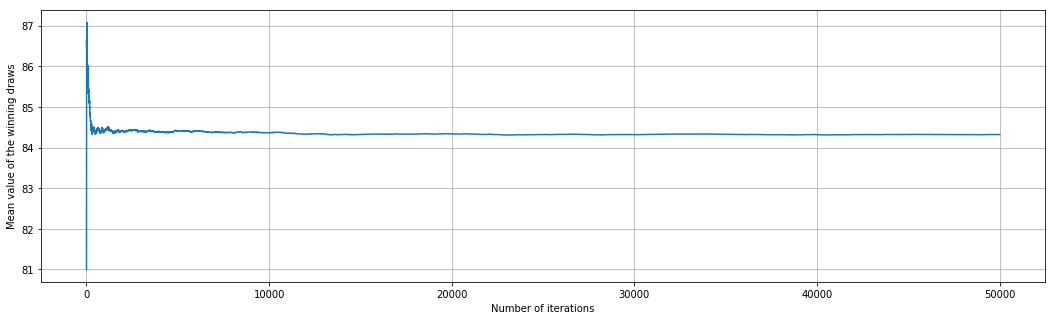

In [15]:
# Convergence

sample_card_n = 15
sample_card_win = win_array[:,sample_card_n]
converge_list = [np.mean(sample_card_win[:i]) for i in range(1,n_iter)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
ax.plot(converge_list)
ax.grid(True, which='major', axis='both')
plt.xlabel('Number of iterations')
plt.ylabel('Mean value of the winning draws')
plt.show()

In [17]:
# Statistics of cards

win_df = pd.DataFrame(win_array)
win_df.columns = ["Card %d" %i for i in range(1,n_card+1)]

print("How many draws you need to win the game with each card?")
summary_df = pd.DataFrame(win_df.mean(axis=0))
summary_df.columns = ['Mean']
summary_df['Standard Deviation'] = win_df.std(axis=0)
summary_df['First quantile'] = win_df.quantile(0.25, axis=0)
summary_df['Second quantile'] = win_df.quantile(0.5, axis=0)
summary_df['Third quantile'] = win_df.quantile(0.75, axis=0)
display(summary_df)

How many draws you need to win the game with each card?


,Mean,Standard Deviation,First quantile,Second quantile,Third quantile
Card 1,84.29538,4.862432,82.0,86.0,88.0
Card 2,84.31758,4.846953,82.0,86.0,88.0
Card 3,84.28684,4.845220,82.0,86.0,88.0
Card 4,84.35138,4.821188,82.0,86.0,88.0
Card 5,84.30998,4.870036,82.0,86.0,88.0
Card 6,84.36444,4.820466,82.0,86.0,88.0
Card 7,84.29360,4.859867,82.0,86.0,88.0
Card 8,84.30876,4.880519,82.0,86.0,88.0
Card 9,84.26830,4.889686,82.0,86.0,88.0
Card 10,84.32518,4.833842,82.0,86.0,88.0


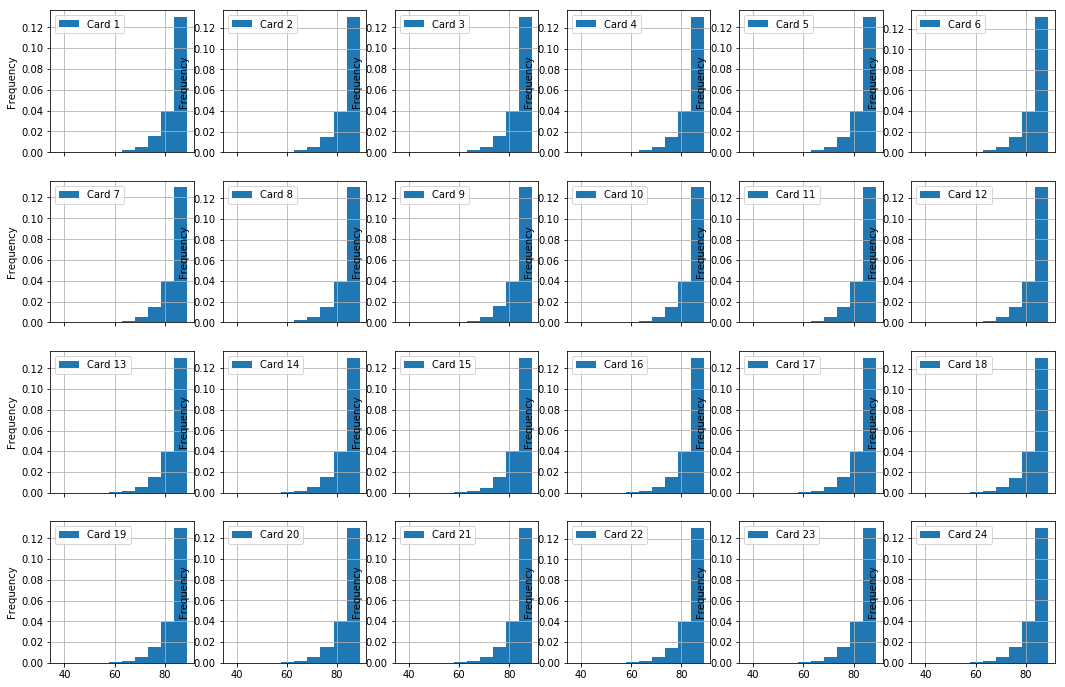

In [43]:
# Histograms

win_df.plot.hist(figsize=(18, 12), normed=True, subplots=True, layout=(4, 6), grid=True, bins=10,
                style='r')
plt.show()

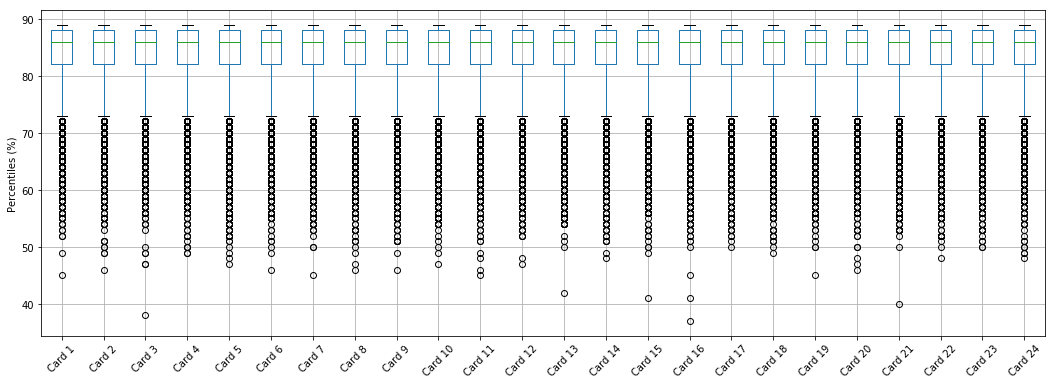

In [19]:
# Boxplots

win_df.plot.box(figsize=(18, 6), layout=(4, 6), grid=True,
                style='r')
plt.xticks(rotation=45)
plt.ylabel('Percentiles (%)')
plt.show()

The theoritical mean value is 84.3125.


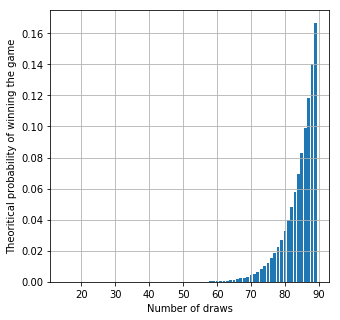

In [47]:
# Theoritical Approach

# calculate the cumulative probabilities - probabilities that game was won no later than ith draw
prob_list = []
for i in range(15, 91):
    probability = (mt.factorial(i)/mt.factorial(i-n_win)) / (mt.factorial(n_draw)/mt.factorial(n_draw-n_win))
    prob_list.append(probability)

# calculate the real probabilities - probabilities that game was won at ith draw
prob_array = np.array(prob_list[1:]) - np.array(prob_list[:-1])  

# theoritical mean
win_array = np.array(range(15, 90))
mean_theo = np.sum(win_array * prob_array)

print('The theoritical mean value is {}.'.format(mean_theo))

# plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.bar(win_array, prob_array)
ax.grid(True, which='major', axis='both')
plt.xlabel('Number of draws')
plt.ylabel('Theoritical probability of winning the game')
plt.show()


#### Conclusion

As seen from the plots, there is mo prefernce between the cards, and all of them are worth the same. So I believe the only way to increase your chance of winning the game would be to play with more cards which obviously means putting more money down!
One last thing to notice is that each of the integers from 1 to 90 have been repeated 4 times thoughout the cards which results in 4x90=360 numbers printed in all of the cards which checks because we have 24 card with 15 numbers on each and thus 24x15=360. So all of the numbers are also worth equally and there should be no preference.